In [7]:
import nltk

nltk.download('punkt')

sentence = """
Today is Friday, and this is the hello world text.
I'm a robot and this text is not human.
Where is my mind?
"""

tokens = nltk.word_tokenize(sentence)

tokens # Token -> Palabra de análisis (Palabra -> puntuaciones, símbolos, palabras)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Today',
 'is',
 'Friday',
 ',',
 'and',
 'this',
 'is',
 'the',
 'hello',
 'world',
 'text',
 '.',
 'I',
 "'m",
 'a',
 'robot',
 'and',
 'this',
 'text',
 'is',
 'not',
 'human',
 '.',
 'Where',
 'is',
 'my',
 'mind',
 '?']

In [10]:
nltk.download('averaged_perceptron_tagger')

tags = nltk.pos_tag(tokens)

tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Today', 'NN'),
 ('is', 'VBZ'),
 ('Friday', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('hello', 'JJ'),
 ('world', 'NN'),
 ('text', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('a', 'DT'),
 ('robot', 'NN'),
 ('and', 'CC'),
 ('this', 'DT'),
 ('text', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('human', 'JJ'),
 ('.', '.'),
 ('Where', 'WRB'),
 ('is', 'VBZ'),
 ('my', 'PRP$'),
 ('mind', 'NN'),
 ('?', '.')]

In [14]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.9 MB/s eta 0:00:00


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


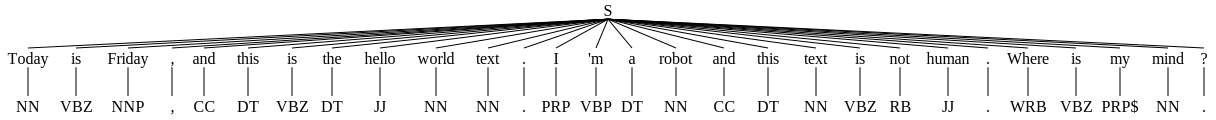

In [15]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

entities = nltk.chunk.ne_chunk(tags)

entities

In [22]:
import pandas as pd

S = pd.DataFrame([
    ["you are good", 1], # text -> muy largo
    ["you are bad", 0],
    ["you are well", 1],
    ["you are wrong", 0],
], columns=["text", "positive"])

S

,text,positive
0,you are good,1
1,you are bad,0
2,you are well,1
3,you are wrong,0


In [27]:
corpus = []

for (i, text,positive) in S.itertuples():
  tokens = nltk.word_tokenize(text)
  for token in tokens:
    if not token in corpus:
      corpus.append(token)

corpus

['you', 'are', 'good', 'bad', 'well', 'wrong']

In [29]:
text = "this is good"

tokens = nltk.word_tokenize(text)

[corpus.index(token) + 1 if token in corpus else 0 for token in tokens]

[-1, -1, 2]

In [39]:
import numpy as np

def textToVec(text):
  tokens = nltk.word_tokenize(text)
  vec = [corpus.index(token) + 1 if token in corpus else 0 for token in tokens]
  while len(vec) < 20:
    vec.append(0)
  while len(vec) > 20:
    vec.pop()
  return np.array(vec)

textToVec("you are the best good person")

array([1, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
S

,text,positive
0,you are good,1
1,you are bad,0
2,you are well,1
3,you are wrong,0


In [52]:
import numpy as np

X = np.array([textToVec(text) for text in S["text"]])

T = pd.DataFrame(X).join(S["positive"])

T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,positive
0,1,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,2,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.decomposition import PCA

X = PCA(n_components=2).fit_transform(T[range(20)])
Y = T["positive"].values

X, Y

(array([[ 1.5,  0. ],
        [ 0.5,  0. ],
        [-0.5,  0. ],
        [-1.5, -0. ]]),
 array([1, 0, 1, 0]))

In [58]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X, Y)

clf.score(X, Y)

1.0

In [64]:
clf.predict(PCA(n_components=2).fit_transform([
    textToVec("you are awful"),
    textToVec("you are good"),
    textToVec("you are well"),
]))

array([1, 1, 0])